# Data integration using BBKNN
This notebook shows how to us the scIB package to do data integration on 3 scATAC-Seq datasets. The three datasets are from:
* 10X Genomics
* Fang et al. 2019
* Published data on GEO, GSM3034638

In [ ]:
import scIB
import scanpy as sc
import anndata as ad
import copy
import os


In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save=400)
cwd = os.getcwd()
cwd

'/mnt/znas/icb_zstore01/groups/ce01/workspace/Benchmarking_data_integration/notebooks/integration'

# Read the data

In [3]:
#finput="../../data/brain_atac_fang_10x/merge_10x_CEMBA180312_3B_bin_merged_filterRowCol_filterCountCell_regression.h5ad"
finput="../../data/brain_atac_3datasets/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged_filterRowCol_regression.h5ad"

adata = ad.read(finput)

In [4]:
adata

AnnData object with n_obs × n_vars = 9300 × 125449 
    obs: 'batch', 'batchname', 'n_genes', 'counts'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'
    uns: 'batchname_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

# Before integration

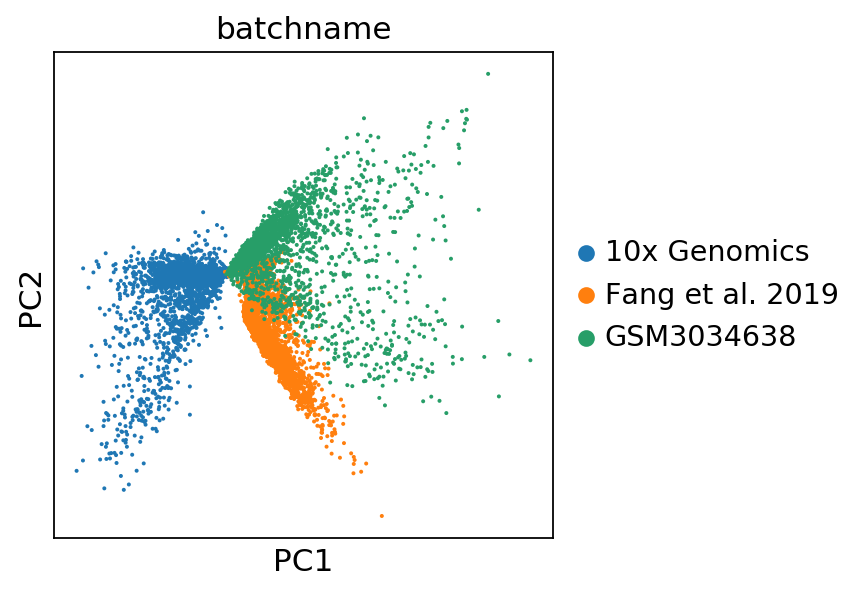

In [5]:
sc.pl.pca(adata,color='batchname')

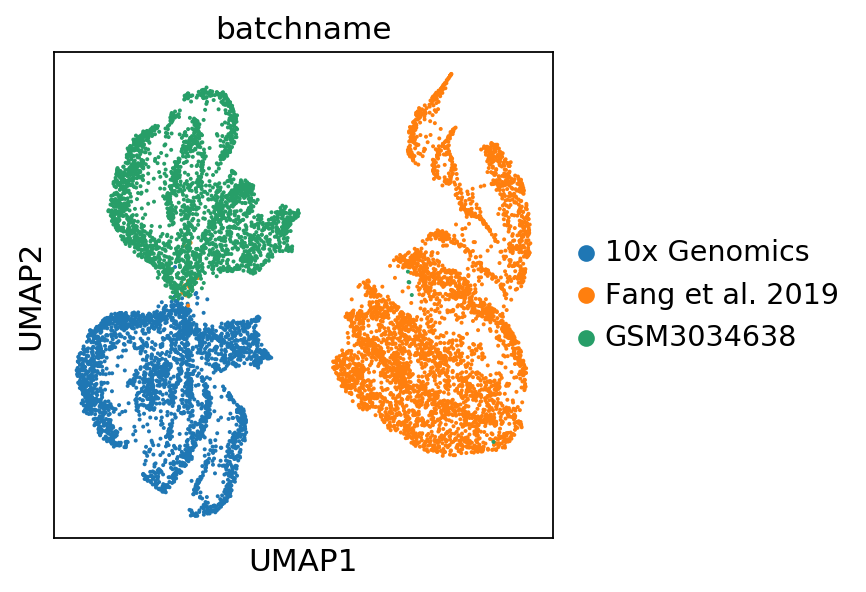

In [6]:
sc.pl.umap(adata,color='batchname')

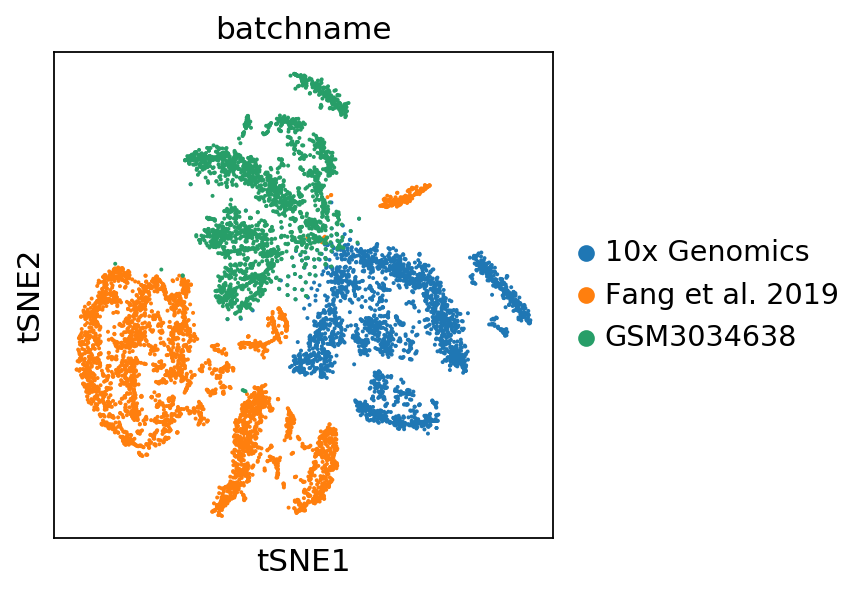

In [7]:
sc.pl.tsne(adata,color='batchname')

# Integration

In [8]:
res=scIB.integration.runBBKNN(adata, batch='batch')

Only the neighborhood graph changes for bbknn

In [9]:
res

AnnData object with n_obs × n_vars = 9300 × 125449 
    obs: 'batch', 'batchname', 'n_genes', 'counts'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'
    uns: 'batchname_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [10]:
foutput="../../data/brain_atac_3datasets/atac_brain_result_BBKNN.h5ad"
res.write(foutput)


# After integration

In [11]:
finput="../../data/brain_atac_3datasets/atac_brain_result_BBKNN.h5ad"
integrated_res = ad.read(finput)

In [12]:
sc.tl.umap(integrated_res)
sc.tl.tsne(integrated_res)

/home/icb/chaichoompu/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


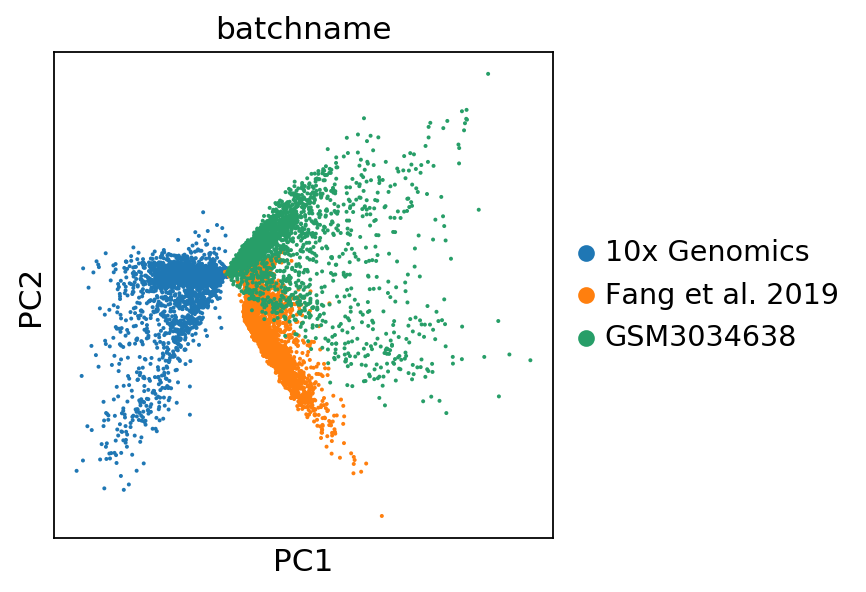

In [13]:
fplot="_brain_atac_after_integration_BBKNN.pdf"
sc.pl.pca(integrated_res, color='batchname',save=fplot)

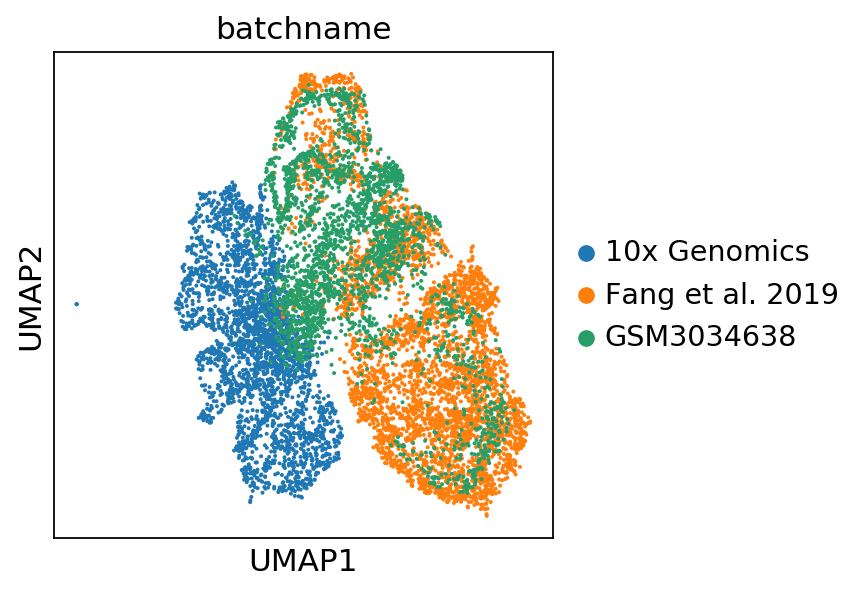

In [14]:
fplot="_brain_atac_after_integration_BBKNN.pdf"
sc.pl.umap(integrated_res, color='batchname',save=fplot)

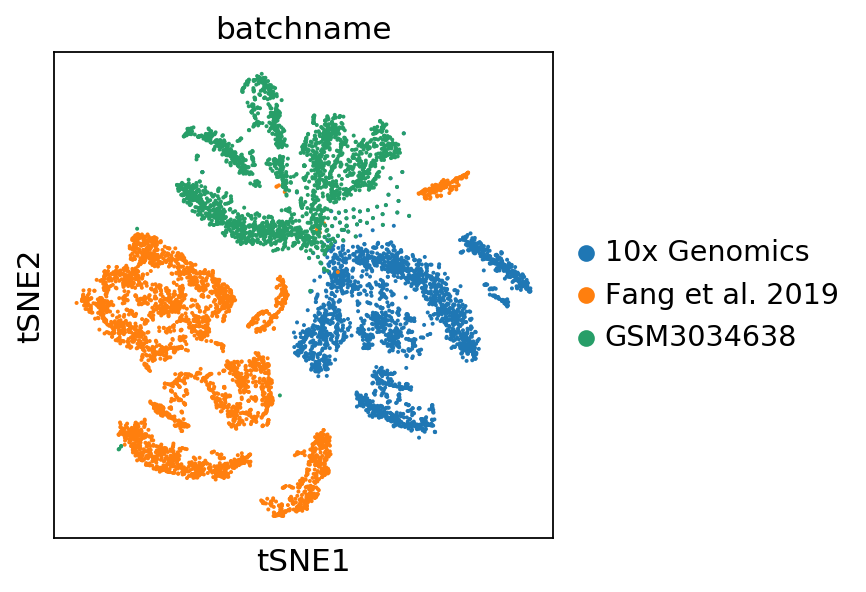

In [15]:
fplot="_brain_atac_after_integration_BBKNN.pdf"
sc.pl.tsne(integrated_res, color='batchname',save=fplot)